## What is missing is that the GAussian kernel is not positive definite.
## Read reference 3

# Determinantal Point Processes (DPP) for physicist

This is a brief introduction to DPP. The best references are:
1. https://arxiv.org/abs/1207.6083
2. https://homes.cs.washington.edu/~taskar/pubs/dpp_tut.pdf
3. https://arxiv.org/pdf/1205.4818.pdf (for Gaussian DPP sections 3.3 and 3.4)

The main idea is that DPP are an elegant way to include repulsion between elements. The only thing you need is to specify the **similarity symmetric matrix $L$** where $L$ is positive semidefinite, i.e. **all its eigenvalues are non-negative**. A related object is is the **marginal kernel $K$**. The relation between the two is:

\begin{equation}
L=K(I-K)^{-1},\quad K=L(L+I)^{-1}
\end{equation}

In terms of the spectral decompisition the relation above simply means that:

\begin{equation}
L=\sum_{i=1}^N \lambda_i v_i v_i^T,\quad K=\sum_{i=1}^N \frac{\lambda_i}{1+\lambda_i} v_i v_i^T
\end{equation}

The similarity matrix $L$ has size $N \times N$. For example, if there are $N$ locations on a line the matrix $L$ gives the similarity between any to pair of locations. To achieve particle repulsion we assume that $L_{i,i}=1$ and $L_{i,j}$ decays with the cartesian distance between locations $i$ and $j$. A common choice is to use $L_{i,j}=v_i \cdot v_j$ where $v_i, v_j$ are the vectors corresponding to elements $i,j$ respectively. This means that $L=B^T B$ matrix where $B^T$ is tall and $B$ is wide. In this case $L$ is known as a Grahm matrix and for any vector $z$ we have $z^T L z= z^T B^T B z = (Bz)^T (Bz) = |Bz|^2 \ge 0$, i.e. $L$ is positive definite.

Other choices are possible but you need to make sure that the resulting matrix is positive definite.
Another choice is a gaussian kernel: $L_{i,j}=\exp[-\gamma d(i,j)^2]$. This matrix is positive semi-definite. 

The fundamental properties of a DPP are:
1. The probability of selecting any subset $Y$ of particles is $P(Y) = \frac{det(L_Y)}{det(L+I)}$ where $L_Y$ is the similarity matrix restricted to the rows and columns corresponding to the few particles selected and $det(L+I)$ is just the normalization constant. Therefore the probability of each selecting the subset $Y=(i_1,i_3,i_7)$ is $P(Y)\propto det(L_Y)$ where $L_Y$ is a $3 \times 3$ matrix. 
2. The normalization constant is $\sum_Y det(L_Y) = det(L+I)$. For example if there are only two locations then there are only 4 possibility: zero particle, one particle at 1, one particle at 2, two particles at 1 and 2. Then we have
\begin{equation}
\sum_Y det(L_Y)= 1 + L_{1,1} + L_{2,2} + \left(L_{1,1}L_{2,2} - L_{1,2}L_{2,1}\right) = (L_{1,1}+1)(L_{2,2}+1)- L_{1,2}L_{2,1} = det(L+I).
\end{equation} Note that we have adopted the convention that the determinant of the empy matrix is $1$, i.e. $det(L_{Y=\text{empty}})=1$. 
3. Sometimes we are interested in the probability of inclusion, i.e. we are interested in the probability that particles $A=(i_1,i_2)$ belong to the subset $Y$. This probability is $P(A\subseteq Y)\propto det(K_A)$ where $K_A$ is the marginal kernel restricted to the rows and columns corresponding to the subset $A$.
4. DPP encodes repulsion because the probability of selecting the particle at location $i$ is $P(i\subseteq Y) = K_{i,i}$ and the probability of selecting two particles at locations $i,j$ is $P(i,j\subseteq Y) = L_{i,i}L_{j,j}-L_{i,j}L_{j,i} = P(i)P(j) - L_{i,j}^2 \le P(i)P(j)$, i.e. the particle repeal each other. 

**Note that DPP are probability distribution over all possible subsets of $N$ elements. Obviously the number of such subsets scales exponentially in $N$ but, amazingly, the normalization constant can be computed in $\mathcal{O}(N^3)$ operations (any determinant can be computed by LU-factorization).** 

## Sampling from DPP intuition

A very nice property of DPP is that an efficient sampling algorithm exists. 

We can use physics to provide the intuition. Suppose that you consider a system of **non-interacting fermions** with Hamiltonian $H$. In this scenario $H_{i,i}$ describes the external potential at site $i$ and $H_{i,j}$ describes the hopping between site $i$ and $j$ (the hopping is long range but decays with distance). Now you diagonalize $H$ to obtain its eigenvalues and eigenvectors $\lambda_i,v_i$. 
In physics any configuration (i.e. wave-function) of $n$ **non-interacting fermions** can be obtained by filling $n$ single-particle eigenstates and by **anti-symmetrize**. The total energy of the configuration is $E=\sum \lambda_i$ and the probability of that configuration is $p\propto exp[-\beta E] = exp[-\beta \sum_i \lambda_i ] = \prod_i f(\lambda_i)$ where $f(\lambda)\equiv \exp[-\beta \lambda]$. 

The idea is the same for DPP with the difference that $H=-K$ and that the function $f(\lambda)$ is not an exponentail but it is linear, i.e. $f(\lambda)\equiv\lambda$. This is necessary since in the DPP the probability is proportional to the determinant which is just the product of the eigenvalues. 

So if we want to sample the location of particles according to a DPP process we should:
1. select each eigenstate of $K$ with probability equal to its eigenvalues (note that the eigenvalues are $\in (0,1)$ b/c $K$ is positive definite).
2. sample the location of the particles according to that anti-symmetrized wave-function.

In the math literature, this approach is based on the fact that **DPPs are Mixtures of Elementary DPPs**. In step (1) we select the mixture (of eigenstate) and in step (2) we sample from that mixture without worrying about the values of the selected eigenvalues.
Step (1) is trivial. Step (2) on the other hand is still difficul.

For example, let us say, that you have selected the eigenstates $v_1,v_5,v_7$. Now you have to sample the location x,y,z of these three particles correspong to the wave-function 
\begin{equation}
\psi(x,y,z)= \frac{1}{\sqrt 3} det \begin{bmatrix}v_1(x) & v_1(y) & v_1(z) \\v_5(x) & v_5(y) & v_5(z) \\ v_7(x) & v_7(y) & v_7(z) \end{bmatrix}
\end{equation}
This is difficult because we do NOT want to work with the full wave-function. If there are 100 locations on the line to choose from the three-particles wave-function above has $100^3=10^6$ distinct values. The brute force approach would be to use the three selected eigenstates to compute the $10^6$ entries for the matrix $M_{i,j,k}$ and then select one entry proportionally to its value. The selected entry would specify, at once, the locations of the three particles. **This, all at one approach, scales badly with the number $n$ of particles** (the total wave-function has $N^n$ values). We would much rather **sample one particle at the time and then update the wave-function to take into account the previous choices**.

Again, the intuition comes from physics. Having observed one particle at location $x_0$ we know that no other particles can be at location $x_0$ (because the total wave-function vanishes every time two corrdinates are intentical). Therefore we need to take the wave-function and project it on the subspace perpendicular to $\psi(x_0)$. We can now repeat the process, i.e. sample another particle and so on. 

Mathematically, this approach relyes on:
1. DPP are closed under conditioning (i.e. projecting a fermionic wave-function on a subspace gives another fermionin wave-function)
2. the order of the observation and projection does not matter, i.e. sequentially sample $x_0,x_1,x_2$ is exactly as likely as sampling $x_1,x_0,x_2$ or any other permutations. 

<img src="./figure/DPP_conditioning_figure.png">

## Sampling from DPP algorithm

Recalling that:
1. $H=-K$
2. the probability of selecting each eigenstate is proportional to its eigenvalue
3. $K=L(L+I)^{-1}$ 

Then the algorithm for smapling from the DPP is:
0. Define the similarity matrix $L$ and perform spectral decomposition $L=V D V^T$ where $D=\text{diag}(\lambda_1,\lambda_2,...,\lambda_N)$ and $V$ contains as columns the eigenvectors of $L$, i.e. $L V_\alpha = \lambda_\alpha V_\alpha$. Note that $L,V$ are $N \times N$.
2. select each $v_\alpha$ with probability $p_\alpha=\frac{\lambda_\alpha}{1+\lambda_\alpha}$
3. At this point you have selected a particular set of eigenvectors $V_J = \{v_\alpha : \alpha \in J\}$. Now you have to sample from the elementary DPP with marginal kernel $K^J = V_J V_J^T = \sum_{\alpha \in J} V_\alpha V_\alpha^T$ where $V_J$ is a matrix of size $|J|\times N$, i.e. $V_J$ is tall matrix and $V_J^T$ is wide matrix
4. Select a location $P(i\subset Y) = K^J_{i,i} = <i| \left(\sum_{\alpha \in J} v_\alpha v_\alpha^T\right)|i> = \sum_{\alpha \in J} v_\alpha(i)^2$
4. Project the wave-function on the subspace orthogonal to $e_i$ and compute an orto-normal basis in that space. Go back to step 3.  

See figure below for the schematic of the algorithm
<img src="./figure/sample_DPP.png">

## k-DPP

Suppose we want exactly $k$ particles. The probability of k-DPP is

\begin{equation}
P_L^k(Y)=\frac{P_L(Y)}{\sum_{|Y'|=k}P_L(Y')}=\frac{det(L_Y)}{\sum_{|Y'|=k}det(L_{Y'})}
\end{equation}
Note that the normalization constant is now much more difficult to compute, i.e. it is no longer the determinant of $det(L+I)$.  
However, it is clear that, 

\begin{equation}
\sum_{|Y'|=2} det(L_{Y'}) = \lambda_1\lambda_2 + \lambda_1 \lambda_3 + \dots + \lambda_{N-1}\lambda_N
\end{equation}
i.e. the sum of all the distinct polynomials of degree $2$ that can be generated using $\Lambda=\{\lambda_1,\dots,\lambda_N\}$. More generally:

\begin{equation}
Z_k = \sum_{|Y'|=k} det(L_{Y'}) = e_k(\lambda_1,\dots,\lambda_N)
\end{equation}
where $e_k$ is the elementary symmetric polynomial.
Likely the symmetric polynomials can be computed recursively:

See figure below for the recursion algorithm
<img src="./figure/symmetric_poly.png">

Once the symmetric polynomials are known we can sample the k eigenvectors according to the algorithm below:
<img src="./figure/sample_k_eigenvectors.png">


In [55]:
import sys
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel
import matplotlib.pylab as plt
%matplotlib inline

class dpp():
    def __init__(self):
        self.lenght = None 
        self.D  = None 
        self.V  = None
        self.M  = None #It is important that the matrix is positive definite
        self.E  = None 
    
    def compute_symmetric_poly(self,k: int) -> None:
        N=self.lenght
        self.E=np.zeros((N+1,k+1)) # i.e. E[N,k] is IN bound
        self.E[:,0]=1
        for l in range(1,k+1):
            for n in range(1,N+1):
                self.E[n,l]=self.E[n-1,l]+self.D[n-1]*self.E[n-1,l-1]
        
    def select_k_eigenvectors(self,k: int) -> list:
         
        # preparation
        N=self.lenght
        n=N
        l=k
        selected = []
        
        # Compute the symmetric polynomial if I don;t have them already
        if(self.E is None):
            self.compute_symmetric_poly(k)
        elif(k != self.E.shape[1]):
            self.compute_symmetric_poly(k)
        
        while l > 0:
            marg = self.D[n-1]*self.E[n-1,l-1]/self.E[n,l]
            if(np.random.uniform() < marg):
                selected.append(n-1) # the -1 is just an indexing problems
                l = l - 1
            n = n - 1
        
        #print("selected eigenvectors",selected)
        return selected

            
    
    def sample(self,k=None,verbose=False) -> list:
        """
        Sample the DPP and returns the locations of the DPP particles.
        If k is provided exactly k locations are returned
        """
            
        # PHASE 1: select the eigenvectors
        if(k==None):
            # Select each eigenvectors with probability lambda/(1+lambda)
            prob = np.divide(self.D,1+self.D)
            x = np.random.rand(prob.size)
            v = np.argwhere(x<prob)
            k = len(v)    
            V = self.V[:, v]
            V = V.reshape(self.lenght,-1)
        elif(k==self.lenght):
            #select all the eigenvectors
            k=self.lenght
            V=self.V
        elif(k>self.lenght):
            # error: Cannot sample more than self.lenght DPP particles
            print("Error: k>self.lenght")
            sys.exit()
        else:
            # select exactly k eigevectors
            selected=self.select_k_eigenvectors(k)
            k = len(selected)    
            V = self.V[:, selected]
            V = V.reshape(self.lenght,-1)
        
        if(verbose):
            print("I will select "+str(k)+" points:")
            
            
        # PHASE 2: Select iteratively a location
        #ground_set, rem_set = np.arange(N), np.full(N, True)
        locations = list(np.arange(0,self.lenght))
        chosen=[]
    
        for n in range(0,k):
            # compute probabilities for each item
            # N, k = V.shape 
            prob=np.linalg.norm(V,ord=None,axis=1)**2/(k-n) #this is probability of choosing each location
            prob=prob.flatten()
            
            # select one location from the available_one 
            loc = np.random.choice(locations,size=1, p=prob.flatten()).item()
            chosen.append(loc)
            if(verbose):
                print("add location",loc)
            
            if(len(chosen)==k):
                return chosen
            else:
                
                # V is a ortonormal basis.
                # Now I need to find a new ortonormal basis for the subspace of V perpendicular to e_loc
                # The constraint that the subspace spanned by V is hortogonal to e_loc is:
                # (c1 V_1 + c2 V_2 + c_k V_k) cdot e_loc = 0 
                # This is equivalent to:
                # c1 V_1(loc) + c2 V_2(loc) + c_k V_k(loc) = 0
                # This subspace has dimension k-1 since the coefficients c1,...,ck are now constrained.
                # I need to find a new ortonormal basis for this subspace.
                # 
                # The procedure is as follow:
                # e_loc = c1* V_1 + c2* V_2 + ... + ck* V_k 
                # The coeff of this decomposition are already available (read off the entry of the vectors):
                # cn* = <e_loc,V_n> = V_n(loc)
                # Build k-1 vectors in the subspace of V perpendicular to e_loc by doing:
                # U_n = V_n - V_1 (cn*/c1*) for n=2,k
                # Note that: <U_n | e_loc> = cn* - c1* (cn*/c1*) = 0
                # Feed these k-1 vectors into a Gram–Schmidt procedure to obtain a hortonormal basis
                # The procedure above works only is c1* is different from zero.
                # For this reason I save myself some problem by choosing V1 as the vector with the largest coeff.
                # Recall that:
                # N, k = V.shape
                
                cstar=V[loc,:] #for each one of the k eigenvectors I have a cstar 
                j  = np.argmax(cstar)
                Vj = V[:,j] # select the special vector
                cj = Vj[loc]
                cstar = np.delete(cstar,j)
                V = np.delete(V,j,axis=1)
                
                # Next I do a vectorized form for:
                # U[0:N,0:k-1] = V[0:N,0:k-1] - Vj[0:N] (cstar[0:k-1]/cj)
                V=V-np.matmul(Vj.reshape(-1,1),(cstar/cj).reshape(1,-1))
                     
                # Gram–Schmidt procedure to find a basis out of the representative vectors
                basis = []
                for l in range(k-n-1):
                    v=V[:,l]
                    w = v - np.sum( np.dot(v,b)*b  for b in basis )
                    basis.append(w/np.linalg.norm(w))
                V=np.array(basis).T
                if(verbose):
                    print("len(basis)",len(basis))
        
        
class dpp_line(dpp):
    def __init__(self, lenght=10, sigma2=1, similarity='soft', bc='PBC'):
        super().__init__()
        self.lenght = lenght
        data = np.zeros([lenght,1])
        data[:,0]=np.arange(0,lenght)
        self.M= np.zeros((self.lenght,self.lenght))
        gamma = 1.0/(2.0*sigma2)
        
        # Compute the matrix with distance-square
        for n1 in range(0,self.lenght):
            self.M[n1,n1]= 1.0
            for n2 in range(n1+1,self.lenght):
                if(bc == 'OBC'):
                    dx = data[n1,0]-data[n2,0]
                elif(bc == 'PBC'):
                    dx =(data[n1,0]-data[n2,0]+self.lenght ) % self.lenght
                    dx = min(dx, self.lenght - dx)
                else:
                    print("ERROR: Unknown bc")
                    sys.exit()
                
                d2=dx*dx
                
                if(similarity == 'soft'):
                    tmp = np.exp(-gamma*d2)    
                elif(similarity == 'hard'):
                    tmp = 0.5*float(d2<sigma2)
                else:
                    print("ERROR: Unknown similarity")
                    sys.exit()
                    
                self.M[n1,n2]= tmp
                self.M[n2,n1]= tmp
        
        # Diagonalize matrix
        self.D, self.V  = np.linalg.eigh(self.M) # Use this because matrix is symmetric
        for l in self.D:
            if(l<-1E-10):
                print("ERROR: Matrix is NOT positive definite")
                print(self.D)
                print(self.M)
                sys.exit()
        
    def sample(self,k=None,verbose=False):
        chosen = np.array(super().sample(k,verbose))
        return chosen

class dpp_plane(dpp):
    def __init__(self, lx=10, ly=10, sigma2=1, similarity='soft', bc='PBC'):
        super().__init__()
        
        data = np.zeros((lx,ly,2))
        for ix in range(lx):
            data[ix,:,0]=ix
        for iy in range(ly):
            data[:,iy,1]=iy
        data=data.reshape(-1,2)
        self.data=data
        self.lenght = lx*ly
        self.lx = lx
        self.ly = ly
        self.M= np.zeros((self.lenght,self.lenght))
        gamma = 1.0/(2.0*sigma2)
        
        # Compute the matrix with distance-square
        for n1 in range(0,self.lenght):
            self.M[n1,n1]= 1.0
            for n2 in range(n1+1,self.lenght):
                if(bc == 'OBC'):
                    dx = data[n1,0]-data[n2,0]
                    dy = data[n1,1]-data[n2,1]
                elif(bc == 'PBC'):
                    dx =(data[n1,0]-data[n2,0]+self.lx ) % self.lx
                    dx = min(dx, self.lx - dx)
                    dy =(data[n1,1]-data[n2,1]+self.ly ) % self.ly
                    dy = min(dy, self.ly - dy)
                else:
                    print("ERROR: Unknown bc")
                    sys.exit()
                
                d2=dx*dx+dy*dy
                
                if(similarity == 'soft'):
                    tmp = np.exp(-gamma*d2)    
                elif(similarity == 'hard'):
                    tmp = 0.5*float(d2<sigma2)
                else:
                    print("ERROR: Unknown similarity")
                    sys.exit()
                    
                self.M[n1,n2]= tmp
                self.M[n2,n1]= tmp
        
        # Diagonalize matrix
        self.D, self.V  = np.linalg.eigh(self.M) # Use this because matrix is symmetric
        for l in self.D:
            if(l<-1E-10):
                print("ERROR: Matrix is NOT positive definite")
                print(self.D)
                print(self.M)
                sys.exit()
        
    def sample(self,k=None,verbose=False):
        chosen_list = super().sample(k,verbose)
        xy_pair=np.array(self.data[chosen_list])
        return xy_pair
        
    
class random():
    def __init__(self):
        self.lenght = None
    
    def sample(self,k=None) -> list:
        """
        Sample k random locations without replacement
        A list of locations is returned
        """
        chosen=np.random.choice(range(self.lenght),size=k,p=None).tolist()
        return chosen

class random_line(random):
    def __init__(self, lenght=10):
        super().__init__()
        self.lenght = lenght
    def sample(self,k=5):
        chosen = np.array(super().sample(k))
        return chosen
    
class random_plane(random):
    def __init__(self, lx=10, ly=10):
        super().__init__()
        data = np.zeros((lx,ly,2))
        for ix in range(lx):
            data[ix,:,0]=ix
        for iy in range(ly):
            data[:,iy,1]=iy
        data=data.reshape(-1,2)
        self.data=data
        self.lenght = lx*ly
    
    def sample(self,k=10):
        chosen_list = super().sample(k)
        xy_pair=np.array(self.data[chosen_list])
        return xy_pair

In [56]:
dpp=dpp_line(lenght=20,sigma2=2, similarity='soft', bc='PBC')
xy_dpp=dpp.sample(verbose=False,k=12)
print(xy_dpp)

[17  6  1 15  2 14  0  8 12 10 19  4]


In [57]:
lx = 10
ly = 10
dpp=dpp_plane(lx=lx,ly=ly,sigma2=1, similarity='hard',bc='OBC')


N_points: dpp vs random 12 12


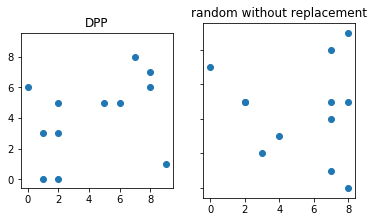

In [61]:
xy_dpp=dpp.sample(verbose=False,k=12)
n_points_dpp = xy_dpp.shape[0]
random2=random_plane(lx,ly)
xy_random=random2.sample(n_points_dpp)
n_points_random = xy_random.shape[0]


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, subplot_kw = {'aspect' : 1.0})
ax1.scatter(xy_dpp[:,0],xy_dpp[:,1])
ax1.set_title('DPP')
ax2.scatter(xy_random[:,0],xy_random[:,1])
ax2.set_title('random without replacement')
print("N_points: dpp vs random",n_points_dpp,n_points_random)